# <B>MOD 4 PROJECT

<b>main factors in life satisfaction:</b>
   <br>health status
   <br>mental health
   <br>income
   <br>employment status

# <b>DATA CLEANING

In [237]:
#importing necessary packages
import numpy as np
from scipy import stats 
import math
import statsmodels.api as sm 
import pylab as py
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [238]:
#importing pandas and the csv files
import pandas as pd
df = pd.read_csv('analytic_data2019.csv')
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,Premature death CI low,Premature death CI high,Premature death (Black),Premature death (Hispanic),Premature death (White),Poor or fair health raw value,Poor or fair health numerator,Poor or fair health denominator,Poor or fair health CI low,Poor or fair health CI high,Poor physical health days raw value,Poor physical health days numerator,Poor physical health days denominator,Poor physical health days CI low,Poor physical health days CI high,Poor mental health days raw value,Poor mental health days numerator,Poor mental health days denominator,Poor mental health days CI low,Poor mental health days CI high,Low birthweight raw value,Low birthweight numerator,Low birthweight denominator,Low birthweight CI low,Low birthweight CI high,Low birthweight (Black),Low birthweight (Hispanic),Low birthweight (White),Adult smoking raw value,Adult smoking numerator,Adult smoking denominator,Adult smoking CI low,Adult smoking CI high,Adult obesity raw value,Adult obesity numerator,Adult obesity denominator,Adult obesity CI low,Adult obesity CI high,Food environment index raw value,Food environment index numerator,Food environment index denominator,Food environment index CI low,Food environment index CI high,Physical inactivity raw value,Physical inactivity numerator,Physical inactivity denominator,Physical inactivity CI low,Physical inactivity CI high,Access to exercise opportunities raw value,Access to exercise opportunities numerator,Access to exercise opportunities denominator,Access to exercise opportunities CI low,Access to exercise opportunities CI high,Excessive drinking raw value,Excessive drinking numerator,Excessive drinking denominator,Excessive drinking CI low,Excessive drinking CI high,Alcohol-impaired driving deaths raw value,Alcohol-impaired driving deaths numerator,Alcohol-impaired driving deaths denominator,Alcohol-impaired driving deaths CI low,Alcohol-impaired driving deaths CI high,Sexually transmitted infections raw value,Sexually transmitted infections numerator,Sexually transmitted infections denominator,Sexually transmitted infections CI low,Sexually transmitted infections CI high,Teen births raw value,Teen births numerator,Teen births denominator,Teen births CI low,Teen births CI high,Teen births (Black),Teen births (Hispanic),Teen births (White),Uninsured raw value,Uninsured numerator,Uninsured denominator,Uninsured CI low,Uninsured CI high,Primary care physicians raw value,Primary care physicians numerator,Primary care physicians denominator,Primary care physicians CI low,Primary care physicians CI high,Ratio of population to primary care physicians.,Dentists raw value,Dentists numerator,Dentists denominator,Dentists CI low,Dentists CI high,Ratio of population to dentists.,Mental health providers raw value,Mental health providers numerator,Mental health providers denominator,Mental health providers CI low,Mental health providers CI high,Ratio of population to mental health providers.,Preventable hospital stays raw value,Preventable hospital stays numerator,Preventable hospital stays denominator,Preventable hospital stays CI low,Preventable hospital stays CI high,Preventable hospital stays (Black),Preventable hospital stays (Hispanic),Preventable hospital stays (White),Mammography screening raw value,Mammography screening numerator,Mammography screening denominator,Mammography screening CI low,Mammography screening CI high,Mammography screening (Black),Mammography screening (Hispanic),Mammography screening (White),Flu vaccinations raw value,Flu vaccinations numerator,Flu vaccinations denominator,Flu vaccinations CI low,Flu vaccinations CI high,Flu vaccinations (Black),Flu vaccinations (Hispanic),Flu vaccinations (White),High school graduation raw value,High school graduation numerator,High school graduation denominator,High 

In [239]:
#checking shape
df.shape

(3195, 534)

In [240]:
#display list of column values
list(df.columns.values)

['State FIPS Code',
 'County FIPS Code',
 '5-digit FIPS Code',
 'State Abbreviation',
 'Name',
 'Release Year',
 'County Ranked (Yes=1/No=0)',
 'Premature death raw value',
 'Premature death numerator',
 'Premature death denominator',
 'Premature death CI low',
 'Premature death CI high',
 'Premature death (Black)',
 'Premature death (Hispanic)',
 'Premature death (White)',
 'Poor or fair health raw value',
 'Poor or fair health numerator',
 'Poor or fair health denominator',
 'Poor or fair health CI low',
 'Poor or fair health CI high',
 'Poor physical health days raw value',
 'Poor physical health days numerator',
 'Poor physical health days denominator',
 'Poor physical health days CI low',
 'Poor physical health days CI high',
 'Poor mental health days raw value',
 'Poor mental health days numerator',
 'Poor mental health days denominator',
 'Poor mental health days CI low',
 'Poor mental health days CI high',
 'Low birthweight raw value',
 'Low birthweight numerator',
 'Low birthw

In [241]:
#checking for nan values
df.isna().sum()

State FIPS Code                         0
County FIPS Code                        0
5-digit FIPS Code                       0
State Abbreviation                      0
Name                                    0
                                     ... 
Female population 18-44 raw value    3121
Female population 45-64 raw value    3121
Female population 65+ raw value      3121
Total female population raw value    3121
Population growth raw value          3121
Length: 534, dtype: int64

In [242]:
#renaming columns by placing an underscore between words to make it more usable
columns_name = df.columns
new_column_names = []
for column_name in columns_name:
    new_column_names.append(column_name.replace(" ", "_"))
print(new_column_names[:10])
df.columns = new_column_names

['State_FIPS_Code', 'County_FIPS_Code', '5-digit_FIPS_Code', 'State_Abbreviation', 'Name', 'Release_Year', 'County_Ranked_(Yes=1/No=0)', 'Premature_death_raw_value', 'Premature_death_numerator', 'Premature_death_denominator']


In [243]:
df = df.iloc[2:]

In [244]:
df = df.loc[((df['County_FIPS_Code']!='000') & (df['County_FIPS_Code']!=0))]

In [245]:
df.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Premature_death_numerator,Premature_death_denominator,Premature_death_CI_low,Premature_death_CI_high,Premature_death_(Black),Premature_death_(Hispanic),Premature_death_(White),Poor_or_fair_health_raw_value,Poor_or_fair_health_numerator,Poor_or_fair_health_denominator,Poor_or_fair_health_CI_low,Poor_or_fair_health_CI_high,Poor_physical_health_days_raw_value,Poor_physical_health_days_numerator,Poor_physical_health_days_denominator,Poor_physical_health_days_CI_low,Poor_physical_health_days_CI_high,Poor_mental_health_days_raw_value,Poor_mental_health_days_numerator,Poor_mental_health_days_denominator,Poor_mental_health_days_CI_low,Poor_mental_health_days_CI_high,Low_birthweight_raw_value,Low_birthweight_numerator,Low_birthweight_denominator,Low_birthweight_CI_low,Low_birthweight_CI_high,Low_birthweight_(Black),Low_birthweight_(Hispanic),Low_birthweight_(White),Adult_smoking_raw_value,Adult_smoking_numerator,Adult_smoking_denominator,Adult_smoking_CI_low,Adult_smoking_CI_high,Adult_obesity_raw_value,Adult_obesity_numerator,Adult_obesity_denominator,Adult_obesity_CI_low,Adult_obesity_CI_high,Food_environment_index_raw_value,Food_environment_index_numerator,Food_environment_index_denominator,Food_environment_index_CI_low,Food_environment_index_CI_high,Physical_inactivity_raw_value,Physical_inactivity_numerator,Physical_inactivity_denominator,Physical_inactivity_CI_low,Physical_inactivity_CI_high,Access_to_exercise_opportunities_raw_value,Access_to_exercise_opportunities_numerator,Access_to_exercise_opportunities_denominator,Access_to_exercise_opportunities_CI_low,Access_to_exercise_opportunities_CI_high,Excessive_drinking_raw_value,Excessive_drinking_numerator,Excessive_drinking_denominator,Excessive_drinking_CI_low,Excessive_drinking_CI_high,Alcohol-impaired_driving_deaths_raw_value,Alcohol-impaired_driving_deaths_numerator,Alcohol-impaired_driving_deaths_denominator,Alcohol-impaired_driving_deaths_CI_low,Alcohol-impaired_driving_deaths_CI_high,Sexually_transmitted_infections_raw_value,Sexually_transmitted_infections_numerator,Sexually_transmitted_infections_denominator,Sexually_transmitted_infections_CI_low,Sexually_transmitted_infections_CI_high,Teen_births_raw_value,Teen_births_numerator,Teen_births_denominator,Teen_births_CI_low,Teen_births_CI_high,Teen_births_(Black),Teen_births_(Hispanic),Teen_births_(White),Uninsured_raw_value,Uninsured_numerator,Uninsured_denominator,Uninsured_CI_low,Uninsured_CI_high,Primary_care_physicians_raw_value,Primary_care_physicians_numerator,Primary_care_physicians_denominator,Primary_care_physicians_CI_low,Primary_care_physicians_CI_high,Ratio_of_population_to_primary_care_physicians.,Dentists_raw_value,Dentists_numerator,Dentists_denominator,Dentists_CI_low,Dentists_CI_high,Ratio_of_population_to_dentists.,Mental_health_providers_raw_value,Mental_health_providers_numerator,Mental_health_providers_denominator,Mental_health_providers_CI_low,Mental_health_providers_CI_high,Ratio_of_population_to_mental_health_providers.,Preventable_hospital_stays_raw_value,Preventable_hospital_stays_numerator,Preventable_hospital_stays_denominator,Preventable_hospital_stays_CI_low,Preventable_hospital_stays_CI_high,Preventable_hospital_stays_(Black),Preventable_hospital_stays_(Hispanic),Preventable_hospital_stays_(White),Mammography_screening_raw_value,Mammography_screening_numerator,Mammography_screening_denominator,Mammography_screening_CI_low,Mammography_screening_CI_high,Mammography_screening_(Black),Mammography_screening_(Hispanic),Mammography_screening_(White),Flu_vaccinations_raw_value,Flu_vaccinations_numerator,Flu_vaccinations_denominator,Flu_vaccinations_CI_low,Flu_vaccinations_CI_high,Flu_vaccinations_(Black),Flu_vaccinations_(Hispanic),Flu_vaccinations_(White),High_school_graduation_raw_value,High_school_graduation_numerator,High_school_graduation_denominator,High_

In [246]:
xls = pd.ExcelFile("2019 County Health Rankings Data - v2.xls")
health_rankings = xls.parse(index_col=None, na_values=['NA'])
df.to_csv('file.csv')
health_rankings.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2
168,Long commute - driving alone,# Workers who Drive Alone,"Number of workers who commute in their car, tr..."
169,NaN,% Long Commute - Drives Alone,"Among workers who commute in their car alone, ..."
170,NaN,95% CI - Low,95% confidence interval
171,NaN,95% CI - High,NaN
172,NaN,Quartile,"Within-state rank: 1 = top quartile, 2=second ..."


In [247]:
xls = pd.ExcelFile('2019 County Health Rankings Data - v2.xls')
# sheet0 = xls.parse(0,skiprows=1) 
# sheet1 = xls.parse(1,skiprows=1) 
# sheet2 = xls.parse(2,skiprows=1) 
sheet3 = xls.parse(3,skiprows=1) 
# sheet4 = xls.parse(4,skiprows=1) 
sheet5 = xls.parse(5,skiprows=1) 
# sheet6 = xls.parse(6,skiprows=1)

In [248]:
sheet3.set_index('FIPS', inplace=True)
sheet5.set_index('FIPS', inplace=True)

In [249]:
combimed = pd.concat([df, sheet5, sheet3], axis=1, sort=False, join='inner')
combimed.shape

(95, 805)

In [250]:
df = combimed.copy()

In [251]:
clean_columns = [x for x in df.columns if
                 ("numerator" not in x) and
                 ("denominator" not in x) and
                 ("CI_low" not in x) and
                 ("CI_high" not in x) and
                 ("(White)" not in x) and
                 ("(Black)" not in x) and
                 ("(Hispanic)" not in x) and 
                 ("CI" not in x) and 
                 ("Rate" not in x) and 
                 ("Ratio" not in x) and 
                 ("Percentage" not in x) and 
                 ("%" not in x) and 
                 ("Quartile" not in x)]

In [252]:
df = combimed[clean_columns]
df.head()

,State_FIPS_Code,County_FIPS_Code,5-digit_FIPS_Code,State_Abbreviation,Name,Release_Year,County_Ranked_(Yes=1/No=0),Premature_death_raw_value,Poor_or_fair_health_raw_value,Poor_physical_health_days_raw_value,Poor_mental_health_days_raw_value,Low_birthweight_raw_value,Adult_smoking_raw_value,Adult_obesity_raw_value,Food_environment_index_raw_value,Physical_inactivity_raw_value,Access_to_exercise_opportunities_raw_value,Excessive_drinking_raw_value,Alcohol-impaired_driving_deaths_raw_value,Sexually_transmitted_infections_raw_value,Teen_births_raw_value,Uninsured_raw_value,Primary_care_physicians_raw_value,Dentists_raw_value,Mental_health_providers_raw_value,Preventable_hospital_stays_raw_value,Mammography_screening_raw_value,Flu_vaccinations_raw_value,High_school_graduation_raw_value,Some_college_raw_value,Unemployment_raw_value,Children_in_poverty_raw_value,Income_inequality_raw_value,Children_in_single-parent_households_raw_value,Social_associations_raw_value,Violent_crime_raw_value,Injury_deaths_raw_value,Air_pollution_-_particulate_matter_raw_value,Drinking_water_violations_raw_value,Severe_housing_problems_raw_value,Driving_alone_to_work_raw_value,Long_commute_-_driving_alone_raw_value,Life_expectancy_raw_value,Premature_age-adjusted_mortality_raw_value,Child_mortality_raw_value,Infant_mortality_raw_value,Frequent_physical_distress_raw_value,Frequent_mental_distress_raw_value,Diabetes_prevalence_raw_value,HIV_prevalence_raw_value,Food_insecurity_raw_value,Limited_access_to_healthy_foods_raw_value,Drug_overdose_deaths_raw_value,Motor_vehicle_crash_deaths_raw_value,Insufficient_sleep_raw_value,Uninsured_adults_raw_value,Uninsured_children_raw_value,Other_primary_care_providers_raw_value,Disconnected_youth_raw_value,Median_household_income_raw_value,Children_eligible_for_free_or_reduced_price_lunch_raw_value,Residential_segregation_-_Black/White_raw_value,Residential_segregation_-_non-white/white_raw_value,Homicides_raw_value,Firearm_fatalities_raw_value,Homeownership_raw_value,Severe_housing_cost_burden_raw_value,Population_raw_value,Communicable_disease_raw_value,Self-inflicted_injury_hospitalizations_raw_value,Cancer_incidence_raw_value,Coronary_heart_disease_hospitalizations_raw_value,Cerebrovascular_disease_hospitalizations_raw_value,Smoking_during_pregnancy_raw_value,Drug_arrests_raw_value,Opioid_hospital_visits_raw_value,Alcohol-related_hospitalizations_raw_value,Motor_vehicle_crash_occupancy_rate_raw_value,On-road_motor_vehicle_crash-related_ER_visits_raw_value,Off-road_motor_vehicle_crash-related_ER_visits_raw_value,Childhood_immunizations_raw_value,Reading_proficiency_raw_value,W-2_enrollment_raw_value,Poverty_raw_value,Older_adults_living_alone_raw_value,Hate_crimes_raw_value,Child_abuse_raw_value,Injury_hospitalizations_raw_value,Fall_fatalities_65+_raw_value,Year_structure_built_raw_value,Male_population_0-17_raw_value,Male_population_18-44_raw_value,Male_population_45-64_raw_value,Male_population_65+_raw_value,Total_male_population_raw_value,Female_population_0-17_raw_value,Female_population_18-44_raw_value,Female_population_45-64_raw_value,Female_population_65+_raw_value,Total_female_population_raw_value,Population_growth_raw_value,State,State,County,County,Life Expectancy,# Deaths,Age-Adjusted Mortality,# Deaths.1,# Deaths.2,# HIV Cases,# Food Insecure,# Limited Access,# Drug Overdose Deaths,# Motor Vehicle Deaths,# Uninsured,# Uninsured,# Uninsured.1,Household Income,Segregation index,Segregation Index,# Firearm Fatalities,# Homeowners,# Households with Severe Cost Burden,Population,Population,# African American,# American Indian/Alaskan Native,# Asian,# Native Hawaiian/Other Pacific Islander,# Hispanic,# Non-Hispanic White,# Not Proficient in English,# Rural,State,State,County,County,Physically Unhealthy Days,Mentally Unhealthy Days,Unreliable,Food Environment Index,# Alcohol-Impaired Driving Deaths,# Driving Deaths,# Chlamydia Cases,# Uninsured,# Uninsured,# Primary Care Physicians,# Dentists,# Mental Health

In [253]:
#checking the data types for each column
for col in df.columns:
    print(df[col].dtypes, col)

object State_FIPS_Code
object County_FIPS_Code
object 5-digit_FIPS_Code
object State_Abbreviation
object Name
object Release_Year
object County_Ranked_(Yes=1/No=0)
object Premature_death_raw_value
object Poor_or_fair_health_raw_value
object Poor_physical_health_days_raw_value
object Poor_mental_health_days_raw_value
object Low_birthweight_raw_value
object Adult_smoking_raw_value
object Adult_obesity_raw_value
object Food_environment_index_raw_value
object Physical_inactivity_raw_value
object Access_to_exercise_opportunities_raw_value
object Excessive_drinking_raw_value
object Alcohol-impaired_driving_deaths_raw_value
object Sexually_transmitted_infections_raw_value
object Teen_births_raw_value
object Uninsured_raw_value
object Primary_care_physicians_raw_value
object Dentists_raw_value
object Mental_health_providers_raw_value
object Preventable_hospital_stays_raw_value
object Mammography_screening_raw_value
object Flu_vaccinations_raw_value
object High_school_graduation_raw_value
objec

In [230]:
dfMH=df[['State_Abbreviation','Name','Poor_mental_health_days_raw_value']]
dfMH.head()

,State_Abbreviation,Name,Poor_mental_health_days_raw_value
1005,KS,Wabaunsee County,3.0022257524
1007,KS,Washington County,3.0973939316
1009,KS,Wilson County,3.5890081255
1011,KS,Wyandotte County,3.7431987724
1013,KY,Adair County,4.6737809882


In [226]:
for col in dfMH.columns:
    print(dfMH[col].dtypes, col)

object State_Abbreviation
object Name
object Poor_mental_health_days_raw_value


In [232]:
#changing the type of mental health days raw value from an object to a float
dfMH['Poor_mental_health_days_raw_value']=dfMH['Poor_mental_health_days_raw_value'].astype('float')

C:\Users\Isabel .LAPTOP-RN1IGMF0\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [233]:
dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean()

State_Abbreviation
KS    3.357957
KY    4.574475
NC    4.413355
ND    2.729966
OH    4.107827
OK    4.806586
OR    4.266214
PA    4.199495
Name: Poor_mental_health_days_raw_value, dtype: float64

Text(0.5, 0, 'State')

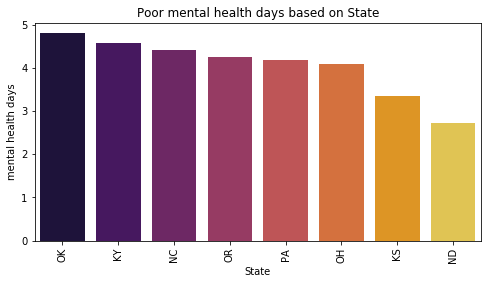

In [234]:
#Poor mental health days based on state graph
fig,ax = plt.subplots(1,1,figsize=(8,4))

cnt = dfMH.groupby(['State_Abbreviation'])['Poor_mental_health_days_raw_value'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y = cnt['Poor_mental_health_days_raw_value'], x = cnt.index, palette= 'inferno')
ax.set_title('Poor mental health days based on State')
ax.set_ylabel('mental health days')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('State')
